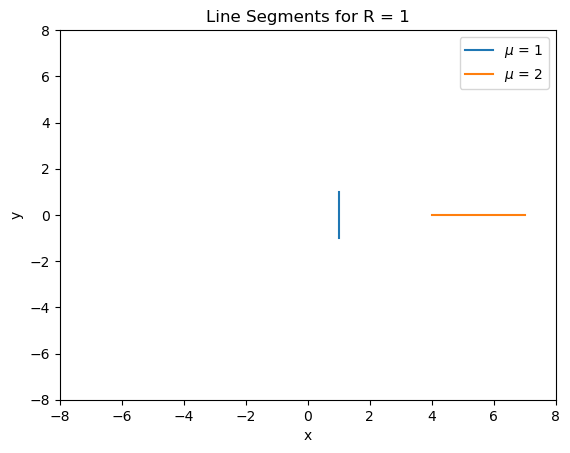

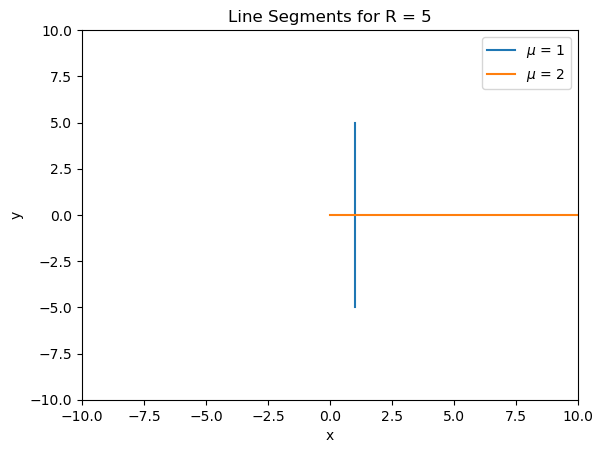

In [1]:
import matplotlib.pyplot as plt

# mu_1 =  
plt.plot([1, 1], [-1, 1], label='$\mu$ = 1')  
plt.plot([4, 7], [0, 0], label='$\mu$ = 2')   

plt.xlim(-8, 8)
plt.xlabel('x')
plt.ylim(-8, 8)
plt.ylabel('y')
plt.legend()
plt.title('Line Segments for R = 1')
plt.show()



plt.plot([1, 1], [-5, 5], label='$\mu$ = 1')  
plt.plot([0, 10], [0, 0], label='$\mu$ = 2')   

plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylim(-10, 10)
plt.ylabel('y')
plt.legend()
plt.title('Line Segments for R = 5')
plt.show()







[[  0 -10]
 [  0  -9]
 [  0  -8]
 [  0  -7]
 [  0  -6]
 [  0  -5]
 [  0  -4]
 [  0  -3]
 [  0  -2]
 [  0  -1]
 [  0   0]
 [  0   1]
 [  0   2]
 [  0   3]
 [  0   4]
 [  0   5]
 [  0   6]
 [  0   7]
 [  0   8]
 [  0   9]]


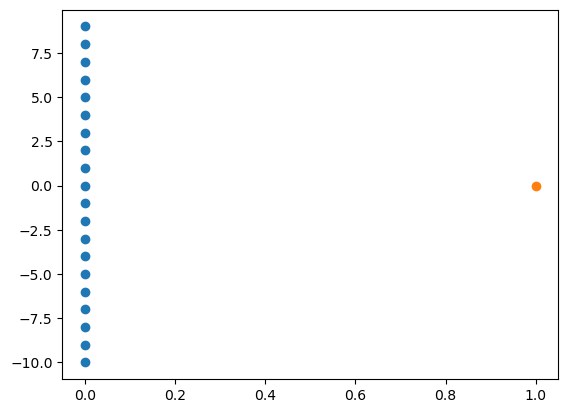

In [13]:
import numpy as np

w = np.array([1,0])

x1s = np.arange(-10,10)
x2s = np.arange(-10,10)
x_final = []

for x1 in x1s:
    for x2 in x2s:
        xarray = np.array([x1,x2])
        if np.dot(xarray, w) == 0:
            x_final.append(xarray)

x_final = np.array(x_final)
print(x_final)
plt.scatter(x_final[:,0], x_final[:,1])
plt.scatter(w[0], w[1])
plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


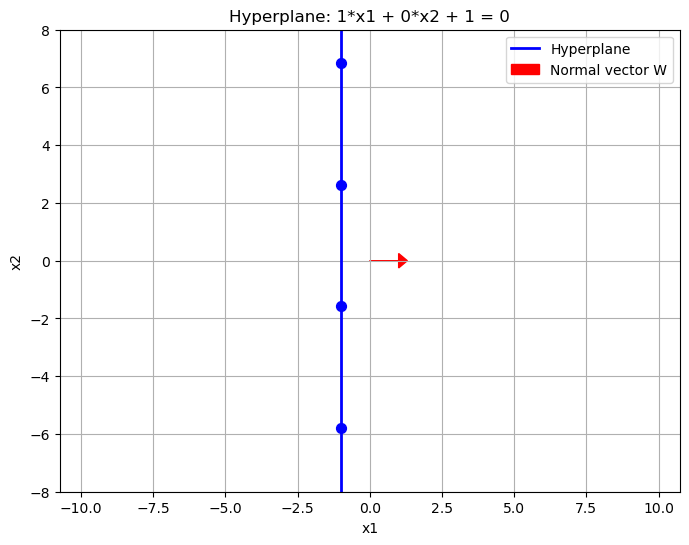

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define hyperplane
w = np.array([1, 0])
B = 1  # Add bias term

# More efficient: directly compute points on hyperplane
# For w = [1,0], hyperplane is x1 + B = 0, so x1 = -B
x1_values = np.full(20, -B)  # x1 = -3 for all points
x2_values = np.linspace(-10, 10, 20)  # x2 can be anything

# Plot hyperplane
plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values, 'b-', linewidth=2, label='Hyperplane')

# Plot normal vector (scaled for visibility)
plt.arrow(0, 0, w[0], w[1], head_width=0.5, head_length=0.3, 
          fc='red', ec='red', label='Normal vector W')

# Plot some points on hyperplane
plt.scatter(x1_values[::4], x2_values[::4], color='blue', s=50)

plt.grid(True)
plt.axis('equal')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title(f'Hyperplane: {w[0]}*x1 + {w[1]}*x2 + {B} = 0')
plt.show()

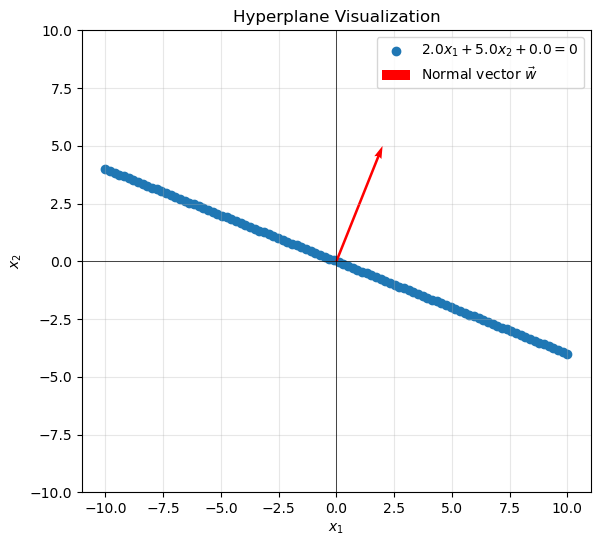

In [14]:
# w dot x + b = 0
# I want to write a function which will plot the hyperplane for a given w vec and B
# w1x1 + w2x2 + b = 0
# We have one degree of freedom, so we can write x2 in terms of x1?
# w1x1 + w2x2 + b = 0
# w1x1 + b = -w2x2
# - (w1x1 + b) / w2 = x2
#  
import numpy as np
import matplotlib.pyplot as plt
def eval_hp(w, b=1):
    x1 = np.linspace(-10,10,100)
    x2 = - (w[0] * x1 + b) / w[1] 
    return np.array([x1, x2]).T



example_w = [2, 5]
example_b = 0
hp = eval_hp(example_w, b=example_b)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(hp[:,0], hp[:,1], 
            label=f'${example_w[0]:.1f}x_1 + {example_w[1]:.1f}x_2 + {example_b:.1f} = 0$')
ax.quiver(0, 0, example_w[0], example_w[1], angles='xy', scale_units='xy', scale=1, 
                 color='red', width=0.005, label='Normal vector $\\vec{w}$')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
ax.set_ylim(-10,10)

ax.set_title('Hyperplane Visualization')
ax.set_aspect('equal')  # This is the key!
